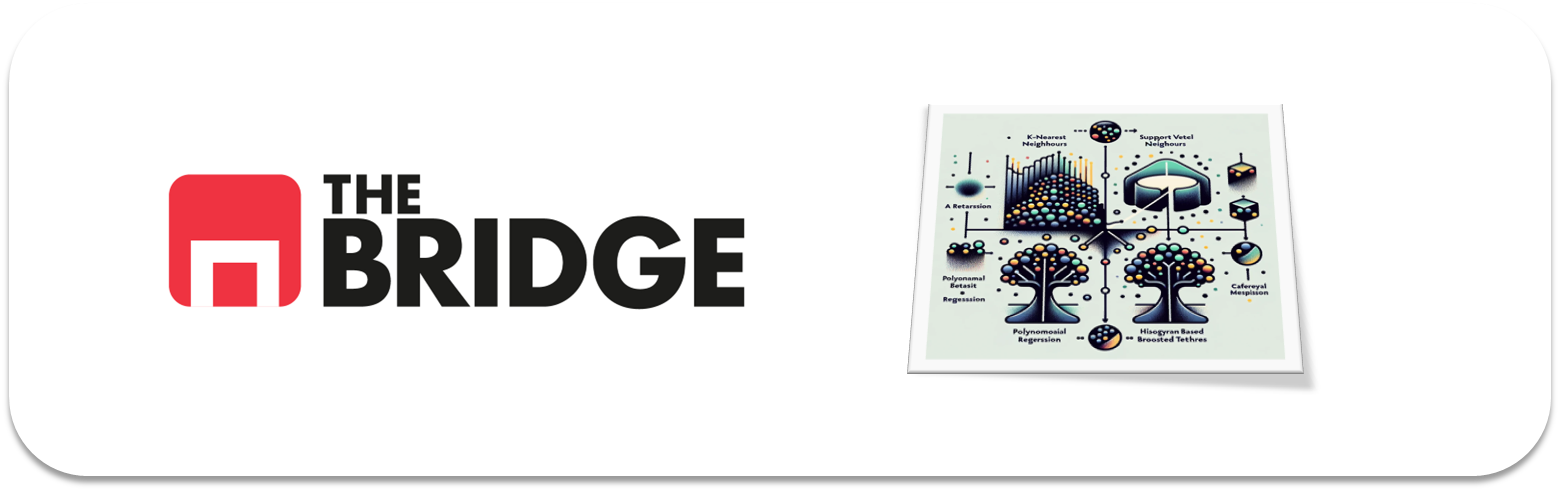

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


Importa los paquetes y módulos que necesites a lo largo del notebook.

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### #1. El problema y los datos

In [29]:
# La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, 
# incluyendo KNN entre los posibles modelos, y aplicando balanceado. 
# Para ello utilizaremos un dataset que ya hemos empleado en los workout. 

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [30]:
df_credit = pd.read_csv(r"C:\Users\segur\Desktop\Data Science SL - The Bridge Repositorios\ONLINE_DS_THEBRIDGE_SL\Sprint_12\Sprint_12\Unidad_01\Practica_Obligatoria\data\credit_npo.csv")
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [31]:
df_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [57]:
df_credit.columns = [
    "incumplimiento_2_anos",
    "uso_tarjeta_credito",
    "edad",
    "n_veces_mora_30_59_dias",
    "ratio_deuda",
    "ingreso_mensual",
    "numero_credito_abiertos",
    "n_veces_mora_90_dias",
    "prestamos_inmobiliarios",
    "n_veces_mora_60_89_dias",
    "numero_dependientes"
]


In [58]:
df_credit.head(10)

,incumplimiento_2_anos,uso_tarjeta_credito,edad,n_veces_mora_30_59_dias,ratio_deuda,ingreso_mensual,numero_credito_abiertos,n_veces_mora_90_dias,prestamos_inmobiliarios,n_veces_mora_60_89_dias,numero_dependientes
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


In [59]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   incumplimiento_2_anos    12537 non-null  int64  
 1   uso_tarjeta_credito      12537 non-null  float64
 2   edad                     12537 non-null  int64  
 3   n_veces_mora_30_59_dias  12537 non-null  int64  
 4   ratio_deuda              12537 non-null  float64
 5   ingreso_mensual          11816 non-null  float64
 6   numero_credito_abiertos  12537 non-null  int64  
 7   n_veces_mora_90_dias     12537 non-null  int64  
 8   prestamos_inmobiliarios  12537 non-null  int64  
 9   n_veces_mora_60_89_dias  12537 non-null  int64  
 10  numero_dependientes      12360 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 1.1 MB


In [60]:
df_credit.isnull().sum()
#Muchos nulos en el ingreso mensual. Los eliminaremos todos. No representan gran cantidad

incumplimiento_2_anos        0
uso_tarjeta_credito          0
edad                         0
n_veces_mora_30_59_dias      0
ratio_deuda                  0
ingreso_mensual            721
numero_credito_abiertos      0
n_veces_mora_90_dias         0
prestamos_inmobiliarios      0
n_veces_mora_60_89_dias      0
numero_dependientes        177
dtype: int64

In [61]:
df_credit_clean = df_credit.dropna()

In [62]:
df_credit_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   incumplimiento_2_anos    11816 non-null  int64  
 1   uso_tarjeta_credito      11816 non-null  float64
 2   edad                     11816 non-null  int64  
 3   n_veces_mora_30_59_dias  11816 non-null  int64  
 4   ratio_deuda              11816 non-null  float64
 5   ingreso_mensual          11816 non-null  float64
 6   numero_credito_abiertos  11816 non-null  int64  
 7   n_veces_mora_90_dias     11816 non-null  int64  
 8   prestamos_inmobiliarios  11816 non-null  int64  
 9   n_veces_mora_60_89_dias  11816 non-null  int64  
 10  numero_dependientes      11816 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 1.1 MB


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Tratamos un problema BINARIO -> SI / NO Ya Queremos saber si una de estas personas va a encontrarse en dificultades financieras dentrode los proximos 2 años SI O NO. 

y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años.

Incumplimiento 2 años es nuestro TARGET



### #1.3
Pinta la distribución de frecuencias del target y coméntala

Text(0.5, 1.0, 'Distribución de la variable objetivo')

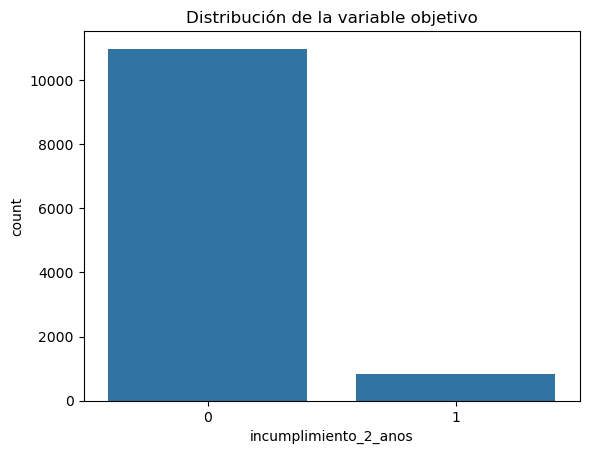

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_credit_clean, x='incumplimiento_2_anos')
plt.title('Distribución de la variable objetivo')

#Aca vemos que probablemente cuando creemos 
#Nuestro modelo nuestro recall no sera el mas alto, y lo que busca NEGOCIO es predecir el incumplimiento no el NO CUMPLIMIENTO

 

In [64]:
conteo_incumplidores_target = df_credit[df_credit["incumplimiento_2_anos"] == 1]["incumplimiento_2_anos"].value_counts()

conteo_incumplidores_target

incumplimiento_2_anos
1    864
Name: count, dtype: int64

In [ ]:
# Definir X e y
X = df_credit_clean.drop("incumplimiento_2_anos", axis=1)
y = df_credit_clean["incumplimiento_2_anos"]

# Dividir en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Estandarizar los datos    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((9452, 10), (2364, 10), (9452,), (2364,))

Modelo SIN balancear


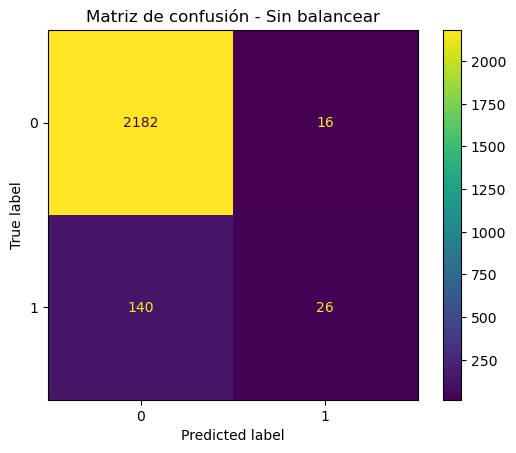

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2198
           1       0.62      0.16      0.25       166

    accuracy                           0.93      2364
   macro avg       0.78      0.57      0.61      2364
weighted avg       0.92      0.93      0.92      2364



In [74]:
knn_sin_balance = KNeighborsClassifier(n_neighbors=5)
knn_sin_balance.fit(X_train_scaled, y_train)

# Predicciones
y_pred_sin_balance = knn_sin_balance.predict(X_test_scaled)

# Evaluación
print("Modelo SIN balancear")
ConfusionMatrixDisplay.from_estimator(knn_sin_balance, X_test_scaled, y_test)
plt.title("Matriz de confusión - Sin balancear")
plt.show()

print(classification_report(y_test, y_pred_sin_balance))

In [75]:
#Efectivamente vemos un recall para el 1 de 16%. 
# Ahora Balancearemos  

In [76]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Verifica el balanceo
print("Antes del balanceo:\n", y_train.value_counts())
print("Después del balanceo:\n", y_train_bal.value_counts())

Antes del balanceo:
 incumplimiento_2_anos
0    8788
1     664
Name: count, dtype: int64
Después del balanceo:
 incumplimiento_2_anos
0    8788
1    8788
Name: count, dtype: int64


In [77]:
#MODELO BALANCEADO CHECK!

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal, y_train_bal)
y_pred = knn.predict(X_test_scaled)

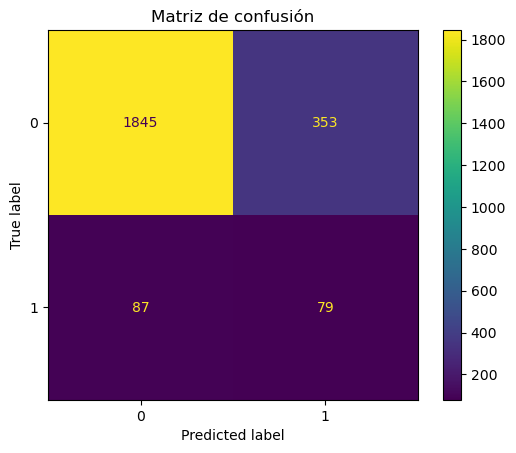

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2198
           1       0.18      0.48      0.26       166

    accuracy                           0.81      2364
   macro avg       0.57      0.66      0.58      2364
weighted avg       0.90      0.81      0.85      2364



In [81]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.title("Matriz de confusión")
plt.show()

print(classification_report(y_test, y_pred))

In [83]:
#MODELO SIN BALANCE
print(classification_report(y_test, y_pred_sin_balance))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2198
           1       0.62      0.16      0.25       166

    accuracy                           0.93      2364
   macro avg       0.78      0.57      0.61      2364
weighted avg       0.92      0.93      0.92      2364



In [48]:
#Mi recall aumento pero mi precision se desplomo. Usaremos otro modelo para probar. Si tenemos mejores resultados 


 Resultados de Logistic Regression


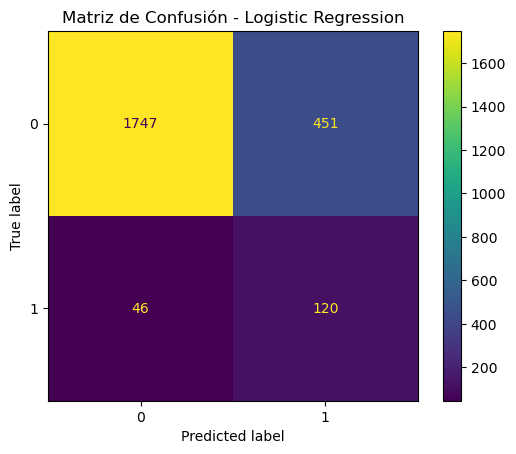

              precision    recall  f1-score   support

           0       0.97      0.79      0.88      2198
           1       0.21      0.72      0.33       166

    accuracy                           0.79      2364
   macro avg       0.59      0.76      0.60      2364
weighted avg       0.92      0.79      0.84      2364



In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Creamos el modelo
modelo_rl = LogisticRegression(max_iter=1000, 
                            random_state=42)

#Entrenamos
modelo_rl.fit(X_train_bal, y_train_bal)

# Predecir
y_pred_logreg = modelo_rl.predict(X_test_scaled)

# Evaluamos
print(" Resultados de Logistic Regression")
ConfusionMatrixDisplay.from_estimator(modelo_rl, X_test_scaled, y_test)
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()

print(classification_report(y_test, y_pred_logreg))

c:\Users\segur\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\segur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\segur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\segur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sam

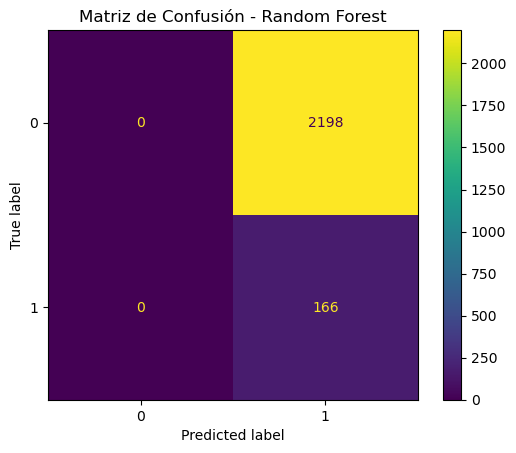

precision      0.070220
recall         1.000000
f1-score       0.131225
support      166.000000
Name: Random Forest, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predecir
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Mostrar matriz de confusión para Random Forest
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

rf_metrics_class_1 = pd.Series(report_rf["1"], name="Random Forest")
rf_metrics_class_1

In [51]:
# Lo mas importante de este modelo es el recall identificar los 1 o los Sis 

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [ ]:
# Configurar validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Paso 3: Comparar modelos base
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Calcular recall promedio con validación cruzada
recall_scores = {
    name: cross_val_score(model, X_train_scaled, y, cv=cv, scoring="recall").mean()
    for name, model in models.items()
}

recall_scores

{'Regresión Logística': 0.06867469879518072,
 'KNN': 0.14096385542168674,
 'Random Forest': 0.1891566265060241}

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definimos la malla de hiperparámetros para KNN
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11, 15],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # p=1: Manhattan, p=2: Euclid
}

# GridSearch con validación cruzada y scoring F1
grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring="f1",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)

# Entrenamos con datos balanceados y escalados
grid_knn.fit(X_train_bal, y_train_bal)

# Guardamos el mejor modelo y los parámetros
best_knn_model = grid_knn.best_estimator_
best_knn_params = grid_knn.best_params_

best_knn_params


Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

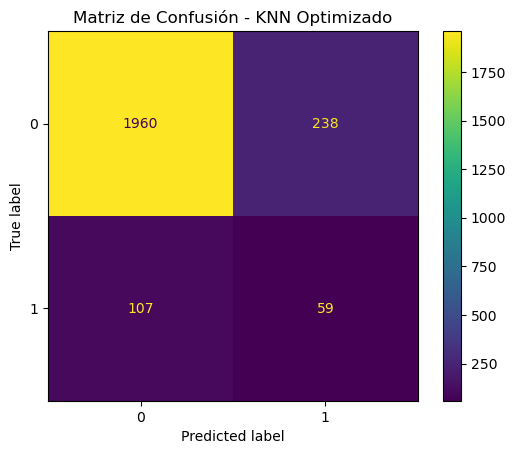

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2198
           1       0.20      0.36      0.25       166

    accuracy                           0.85      2364
   macro avg       0.57      0.62      0.59      2364
weighted avg       0.90      0.85      0.87      2364



In [94]:
# Evaluamos en el conjunto de test original
best_knn_model = grid_knn.best_estimator_
y_pred = best_knn_model.predict(X_test_scaled)

# Mostrar matriz de confusión y métricas
ConfusionMatrixDisplay.from_estimator(best_knn_model, X_test_scaled, y_test)
plt.title("Matriz de Confusión - KNN Optimizado")
plt.show()

print(classification_report(y_test, y_pred))

In [95]:
#Optimizando nuestro modelo de KNN aumenta considerablemente de un 14% a un 36%.
# Deberiamos buscar mas hiperaparametros e intentar mejorar el modelo